<a href="https://colab.research.google.com/github/trudramukerji14/Random/blob/master/HadamardQWGH2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a numerical simulation of the Hadamard quantum random walk on the integers. To get started, we first import a few packages

In [2]:
import numpy as np
from scipy import linalg
import matplotlib as plt
import matplotlib.pyplot as plt
import math

We first define the number of steps of the quantum walk with $N$, which gives us $P=2N+1$ possible points on the integer lattice since we are starting at $0$.

Is this a probability distribution? 0.9999999999999786


<function matplotlib.pyplot.show(*args, **kw)>

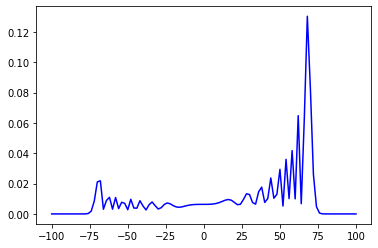

In [3]:


#Set number of steps and positions:

N = 100
P = 2*N+1 #Number of possible positions



#define coin operator

r = 1/(math.sqrt(2))
#print(r)



c0 = np.array([1,0]) #These are the basis vectors for the coin space
c1 = np.array([0,1])


C00 = np.outer(c0, c0)
C01 = np.outer(c0,c1)
C10 = np.outer(c1, c0)
C11 = np.outer(c1, c1)


C= r*(C00+C01+C10-C11)
#print(C)

b = np.array([[1,0]])
coin = np.kron(np.eye(P), C) #This is the coin operator

#Define the evolution operator



X = np.eye(P) #This is P by P identity matrix
d  = np.roll(X, -1, axis=0) #the axis is now 0, so we shift along the columns
u  = np.roll(X, 1, axis=0) 
Down = np.kron(d, C11) #S \otimes P_{D}
Up=np.kron(u, C00) #S otimes P_{U}
S_hat = Up+Down #This is the shift operator

U = S_hat.dot(coin) #This is the evolution operator

#Define the initial state:

pos = np.zeros(P)
pos[N] = 1
psi0 = np.kron(pos,c0)
#psi0 = r*np.kron(pos,c0)+ r*1j*np.kron(pos,c1)
Psi0 = psi0.reshape(2*P,1)



#State after N steps:
psiN = (np.linalg.matrix_power(U,N)).dot(Psi0)



#Determine probability of outcome:
prob = np.zeros(P)
for k in range(P):
    posn = np.zeros(P)
    posn[k] = 1
    Posn = posn.reshape(P,1)
    A=np.matmul(Posn,Posn.T) #projection to Posn
    M_hat_k = np.kron(A, np.eye(2))
    proj = M_hat_k.dot(psiN)
    prob[k] = np.matmul(proj.T, proj.conjugate()).real #norm squared of state

#Information needed for plotting
xval=np.arange(-N, N+1)
x0 = xval[0::2]
y0 = prob[0::2]

#print(y0)

print('Is this a probability distribution?',np.sum(y0))

plt.plot(x0,y0, 'b-')
plt.show #This plots the distribution of the quantum walk



In [1]:
#Flip Flop operator

flip = C01 + C10
flipop = np.kron(np.eye(P), flip)
#S_flip = S_hat.dot(flipop)
S_flip = flipop.dot(S_hat)
S_hat.dot(np.kron(pos,c0))

U_flip = S_flip.dot(coin) #This is the evolution operator with flip-flop

#State after N steps:
psiN = (np.linalg.matrix_power(U_flip,N)).dot(Psi0)

#Determine probability of outcome:
prob = np.zeros(P)
for k in range(P):
    posn = np.zeros(P)
    posn[k] = 1
    Posn = posn.reshape(P,1)
    A=np.matmul(Posn,Posn.T) #projection to Posn
    M_hat_k = np.kron(A, np.eye(2))
    proj = M_hat_k.dot(psiN)
    prob[k] = np.matmul(proj.T, proj.conjugate()).real #norm squared of state

print(prob)

#Information needed for plotting
xval=np.arange(-N, N+1)
x0=nonzeropos = xval[0::2]
y0=probeven = prob[0::2]

print('Is this a probability distribution?',np.sum(y0))

#plot :)

plt.plot(x0,y0, 'r-')
plt.show




NameError: ignored